# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from scipy.stats import zscore
import matplotlib.pyplot as plt

### Read the csv data into a pandas dataframe and display the first 5 samples

In [14]:
df = pd.read_csv('Real estate.csv')
print(df.head())

   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

### Show more information about the dataset

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None


### Find how many samples are there and how many columns are there in the dataset

In [16]:
print("Number of samples:", len(df))
print("Number of columns:", len(df.columns))

Number of samples: 414
Number of columns: 8


### What are the features available in the dataset?

In [17]:
features = df.columns
print("Features in the dataset:", features)


Features in the dataset: Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


### Check if any features have missing data

In [18]:
print("Missing data in each feature:\n", df.isnull().sum())


Missing data in each feature:
 No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


### Group all the features as dependent features in X

In [19]:
X = df.drop('Y house price of unit area', axis=1)  # Assuming 'Y house price of unit area' is the dependent variable


### Group feature(s) as independent features in y

In [20]:
y = df['Y house price of unit area']
print(y)

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64


### Split the dataset into train and test data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Choose the model (Linear Regression)

In [22]:
model = LinearRegression()


### Create an Estimator object

In [23]:
estimator = model.fit(X_train, y_train)


### Train the model

In [24]:
estimator.fit(X_train, y_train)


LinearRegression()

### Apply the model

In [25]:
y_pred = estimator.predict(X_test)


### Display the coefficients

In [26]:
print("Coefficients:", estimator.coef_)


Coefficients: [-5.61695287e-03  5.40743502e+00 -2.67827999e-01 -4.81543315e-03
  1.08114445e+00  2.26048799e+02 -3.01254914e+01]


### Find how well the trained model did with testing data

In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error on Test Data:", mse)
print("R2 Score on Test Data:", r2)

Mean Squared Error on Test Data: 54.60196067337765
R2 Score on Test Data: 0.674522867035084


### Plot House Age Vs Price
#### Hint: Use regplot in sns

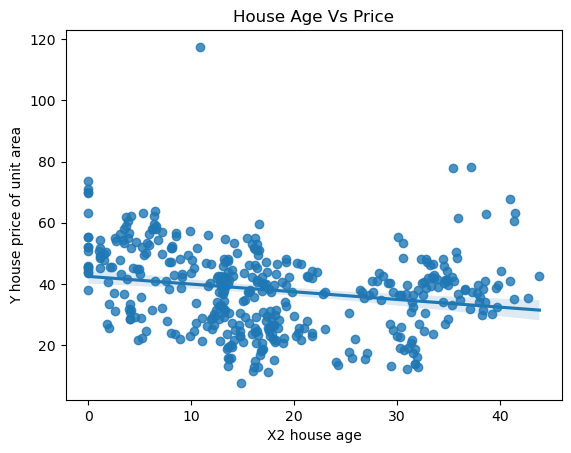

In [28]:
sns.regplot(x='X2 house age', y='Y house price of unit area', data=df)
plt.title('House Age Vs Price')
plt.show()

### Plot Distance to MRT station Vs Price

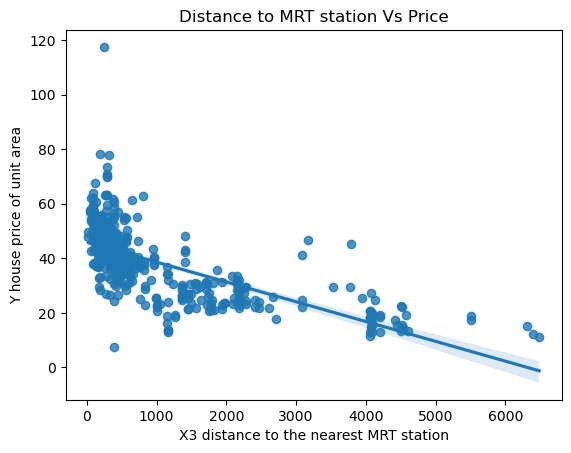

In [29]:
sns.regplot(x='X3 distance to the nearest MRT station', y='Y house price of unit area', data=df)
plt.title('Distance to MRT station Vs Price')
plt.show()

### Plot Number of Convienience Stores Vs Price

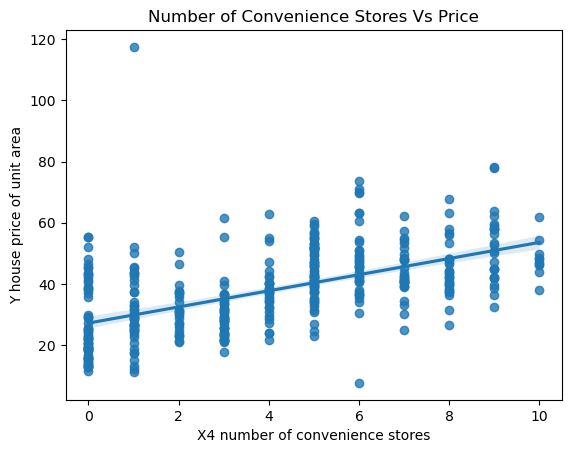

In [30]:
sns.regplot(x='X4 number of convenience stores', y='Y house price of unit area', data=df)
plt.title('Number of Convenience Stores Vs Price')
plt.show()

### Trying Different model to check the accuracy difference(Random Forest)

C:\Users\macwa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


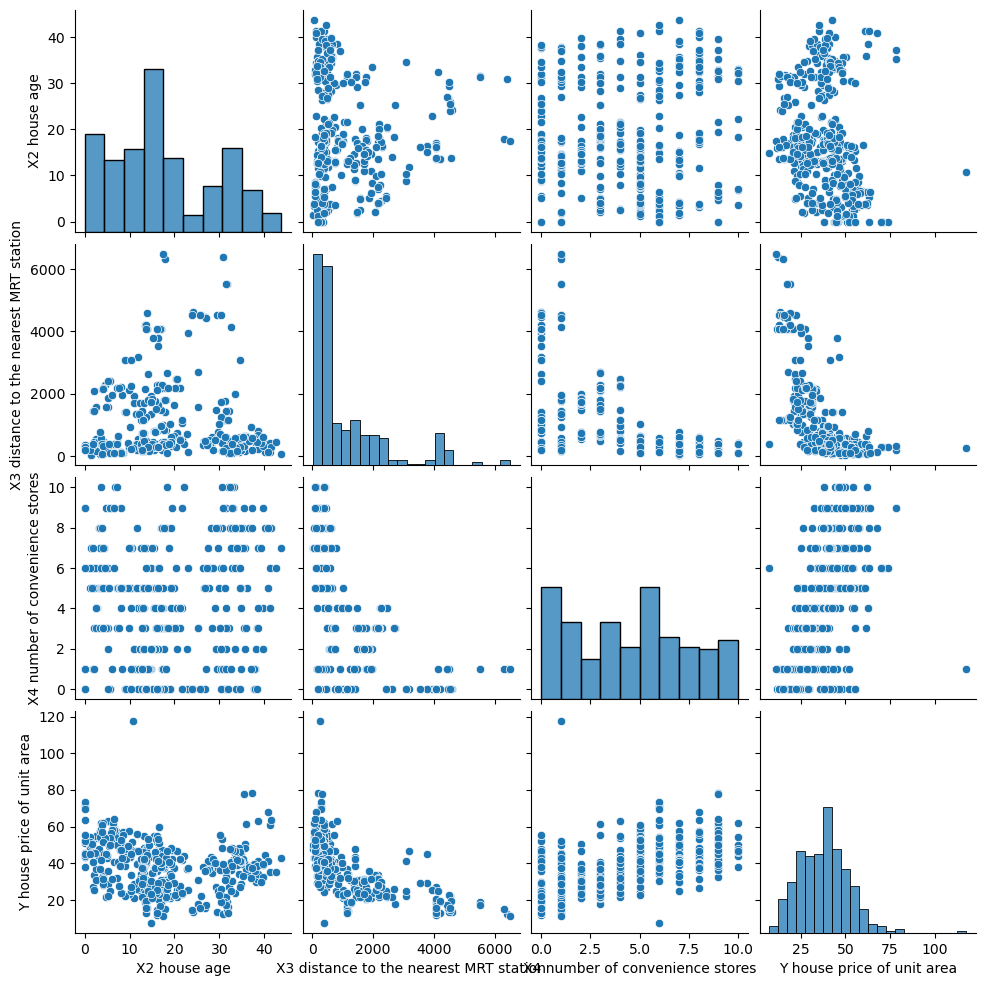

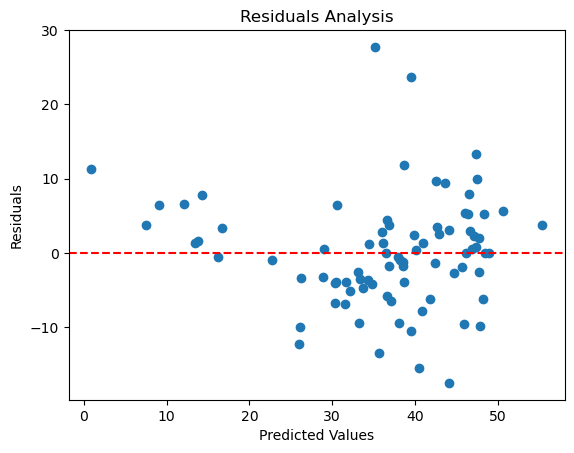

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Read the csv data into a pandas dataframe
df = pd.read_csv('Real estate.csv')

# Feature Engineering
# Example: Creating a new feature as a combination of existing features
df['combined_feature'] = df['X2 house age'] * df['X3 distance to the nearest MRT station']

# Investigate relationships between features and the target variable
# Example: Use pairplot to visualize relationships
sns.pairplot(df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'Y house price of unit area']])
plt.show()

# Handling Outliers
# Example: Remove outliers using z-score
z_scores = zscore(df[['X2 house age', 'Y house price of unit area']])
df_no_outliers = df[(np.abs(z_scores) < 3).all(axis=1)]

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Regularization
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)

# Cross-Validation
cross_val_scores = cross_val_score(model, X, y, cv=5)
mean_cv_score = np.mean(cross_val_scores)

# Hyperparameter Tuning
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']

# Data Preprocessing
# Example: Impute missing values with mean
df.fillna(df.mean(), inplace=True)

# Residual Analysis
y_pred = lasso_model.predict(X_test)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Analysis')
plt.show()


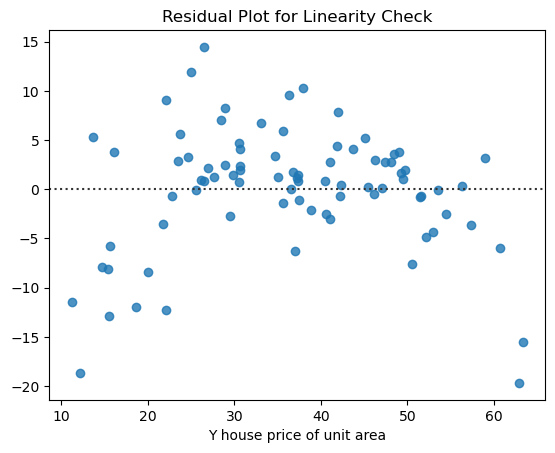

Lasso Model - Mean Squared Error on Test Data: 54.83632759091239
Lasso Model - R2 Score on Test Data: 0.6731258279646862
Random Forest Model - Mean Squared Error on Test Data: 31.859230951807227
Random Forest Model - R2 Score on Test Data: 0.81009013191504


In [32]:

# Feature Selection
selector = RFE(model, n_features_to_select=5)
selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.support_]

# Ensemble Models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Check Assumptions
# Example: Check for linearity using a residual plot
sns.residplot(x=y_test, y=y_pred)
plt.title('Residual Plot for Linearity Check')
plt.show()

# Data Gathering
# Evaluate the performance of the model
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display results
print("Lasso Model - Mean Squared Error on Test Data:", mse_lasso)
print("Lasso Model - R2 Score on Test Data:", r2_lasso)

print("Random Forest Model - Mean Squared Error on Test Data:", mse_rf)
print("Random Forest Model - R2 Score on Test Data:", r2_rf)


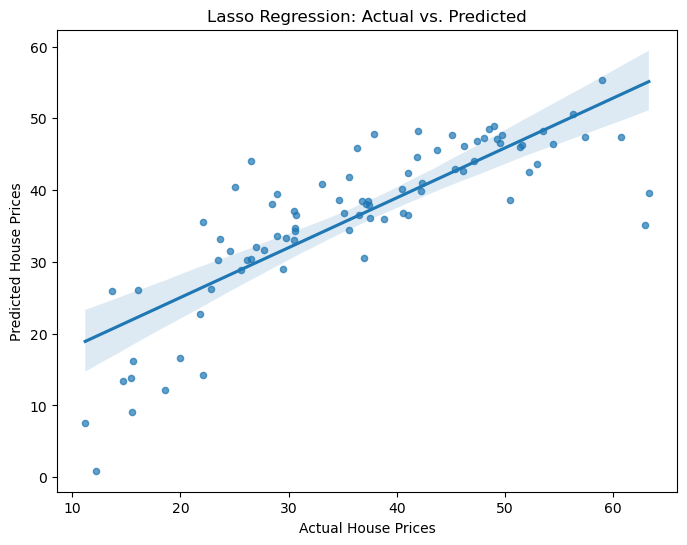

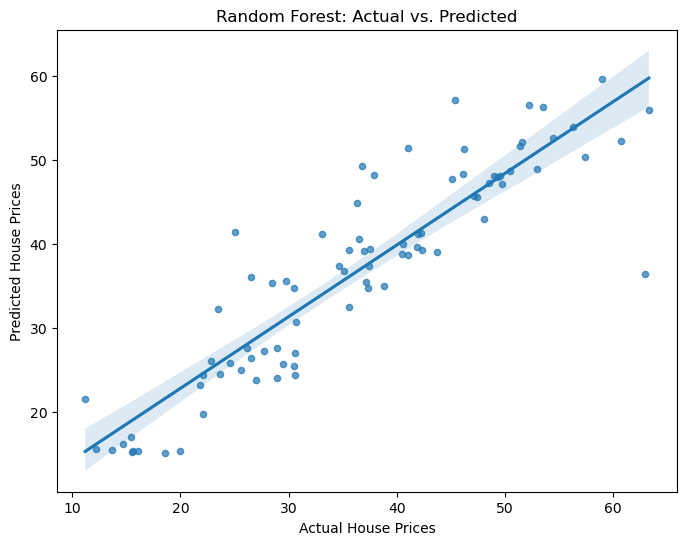

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lasso Model Fitting Chart
y_pred_lasso = lasso_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_lasso, scatter_kws={'s': 20, 'alpha': 0.7})
plt.title('Lasso Regression: Actual vs. Predicted')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()

# Random Forest Model Fitting Chart
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_rf, scatter_kws={'s': 20, 'alpha': 0.7})
plt.title('Random Forest: Actual vs. Predicted')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()


#### Lasso Model - Mean Squared Error on Test Data: 54.83632759091239
#### Lasso Model - R2 Score on Test Data: 0.6731258279646862
#### Random Forest Model - Mean Squared Error on Test Data: 31.859230951807227
#### Random Forest Model - R2 Score on Test Data: 0.81009013191504

### Thus, Random Forest works great predicting more accurate housing prices then Lasso/Linear Regression
